In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Salaries.csv')
df.head(5)

C:\Users\Digvijay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
df['JobTitle'].value_counts()

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
                                                      ... 
ASSISTANT TO THE DIRECTOR, PUBLIC AFFAIRS       RS       1
HH Mechanical Shop Sprv                                  1
ASSOCIATE HUMAN RESOURCES ANALYST                        1
SENIOR MEDICAL TRANSCRIBER TYPIST                        1
ASSISTANT RECREATION SUPERVISOR                          1
Name: JobTitle, Length: 2159, dtype: int64

In [6]:
df.groupby('JobTitle')['JobTitle'].count()

JobTitle
ACCOUNT CLERK                                      83
ACCOUNTANT                                          5
ACCOUNTANT INTERN                                  48
ACPO,JuvP, Juv Prob (SFERS)                         1
ACUPUNCTURIST                                       1
                                                 ... 
X-RAY LABORATORY AIDE                              26
X-Ray Laboratory Aide                             100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1
Youth Comm Advisor                                  4
ZOO CURATOR                                         1
Name: JobTitle, Length: 2159, dtype: int64

In [7]:
new_df = df.groupby(['JobTitle'],as_index=False).TotalPay.mean()
new_df

,JobTitle,TotalPay
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,50823.942700
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,41414.307500


In [8]:
new_df = new_df.sort_values('TotalPay', ascending=False)
new_df

,JobTitle,TotalPay
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
466,Chief Investment Officer,339653.700000
474,Chief of Police,329183.646667
475,"Chief, Fire Department",325971.683333
586,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
...,...,...
499,"Commissioner 16.700c, No Pay",25.760000
975,IS Technician Assistant,0.000000
1274,Not provided,0.000000
1538,Public Safety Comm Tech,0.000000


In [9]:
df_ = new_df[:20]
df_

,JobTitle,TotalPay
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
466,Chief Investment Officer,339653.700000
474,Chief of Police,329183.646667
475,"Chief, Fire Department",325971.683333
586,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
324,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
838,"Gen Mgr, Public Trnsp Dept",297769.413333
206,Asst Chf of Dept (Fire Dept),281763.483889
576,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
621,"Dep Dir for Investments, Ret",278592.545000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

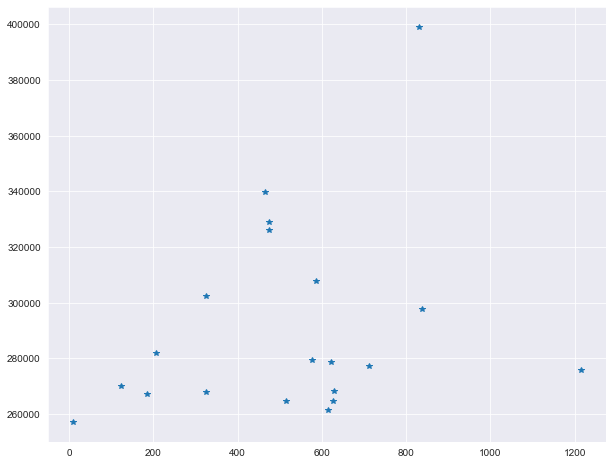

In [12]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.plot(df_['TotalPay'],'*')

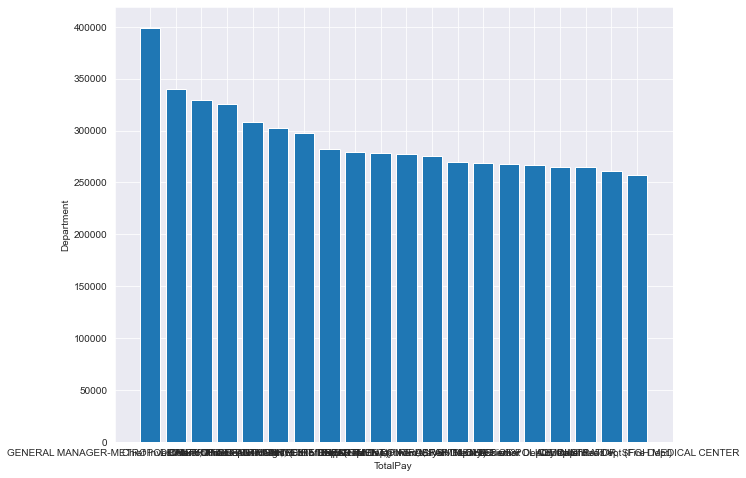

In [13]:
plt.figure(figsize=(10,8))
plt.bar(df_['JobTitle'] , df_['TotalPay'])
plt.ylabel(ylabel='Department')
plt.xlabel(xlabel='TotalPay')

plt.show()